In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
data_dir = r"F:\Image\Projet\Images"

In [3]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
nombre_classes = 120

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(nombre_classes)
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │        15,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,662,456 (25.42 MB)

 Trainable params: 6,662,456 (25.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [8]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 217s 367ms/step - accuracy: 0.0149 - loss: 4.7412 - val_accuracy: 0.0231 - val_loss: 4.5947
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 155s 301ms/step - accuracy: 0.0435 - loss: 4.4382 - val_accuracy: 0.0508 - val_loss: 4.3784
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 144s 279ms/step - accuracy: 0.0938 - loss: 4.0584 - val_accuracy: 0.0661 - val_loss: 4.2551
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 146s 284ms/step - accuracy: 0.2078 - loss: 3.3762 - val_accuracy: 0.0702 - val_loss: 4.4616
Epoch 5/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 144s 279ms/step - accuracy: 0.4443 - loss: 2.2370 - val_accuracy: 0.0639 - val_loss: 5.4764
Epoch 6/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 144s 279ms/step - accuracy: 0.7397 - loss: 1.0179 - val_accuracy: 0.0571 - val_loss: 7.8253
Epoch 7/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 167s 325ms/step - accuracy: 0.9054 - loss: 0.3685 - val_accuracy: 0.0554 - val_loss: 10.5749
Epoch 8/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 178s 345ms/step - accuracy: 0.9615 

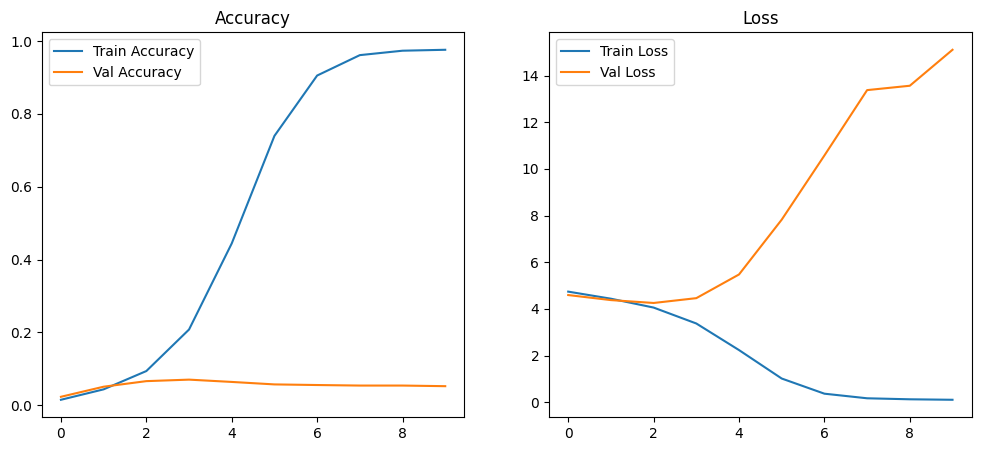

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [10]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

In [15]:
img_height = 180
img_width = 180
nombre_classes = 120 

model_1 = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)), 
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(nombre_classes)
])
model_1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 120)            │        15,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,662,456 (25.42 MB)

 Trainable params: 6,662,456 (25.42 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [17]:
import time

epochs = 10
start = time.time()
history_1 = model_1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)
end = time.time()
print("it took : ",end - start)

Epoch 1/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 196s 377ms/step - accuracy: 0.0208 - loss: 4.6457 - val_accuracy: 0.0338 - val_loss: 4.4467
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 198s 385ms/step - accuracy: 0.0448 - loss: 4.3478 - val_accuracy: 0.0537 - val_loss: 4.2844
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 194s 377ms/step - accuracy: 0.0639 - loss: 4.1777 - val_accuracy: 0.0700 - val_loss: 4.1046
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 188s 366ms/step - accuracy: 0.0819 - loss: 4.0361 - val_accuracy: 0.0824 - val_loss: 4.0527
Epoch 5/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 187s 362ms/step - accuracy: 0.0982 - loss: 3.9332 - val_accuracy: 0.0979 - val_loss: 3.9664
Epoch 6/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 185s 360ms/step - accuracy: 0.1135 - loss: 3.8493 - val_accuracy: 0.1069 - val_loss: 3.8801
Epoch 7/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 200s 389ms/step - accuracy: 0.1243 - loss: 3.7673 - val_accuracy: 0.1069 - val_loss: 3.8466
Epoch 8/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 187s 363ms/step - accuracy: 0.1328 -

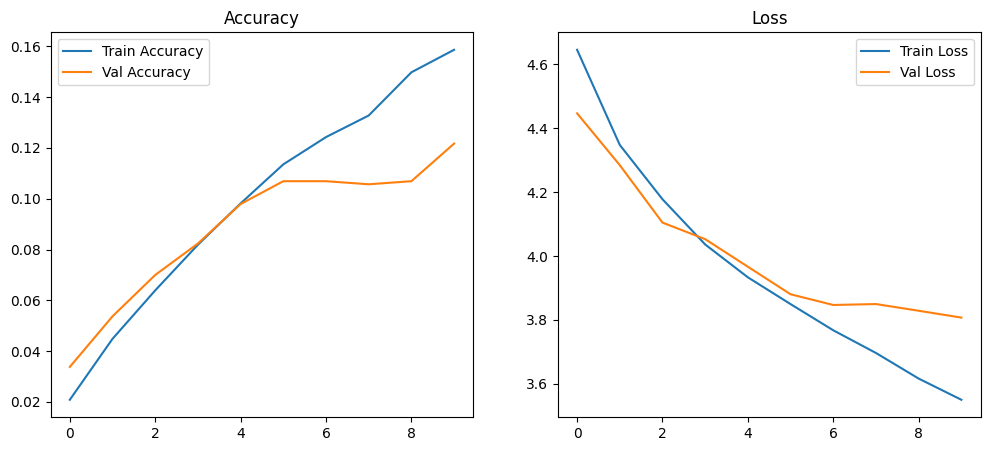

In [18]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [19]:
model_1.save("model_1_dog_breeds.h5")

In [20]:
from tensorflow.keras.models import load_model

model_1 = load_model("model_1_dog_breeds.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
🐶 Top 3 des races prédites :
  • n02097298-Scotch_terrier (32.88 % de confiance)
  • n02104365-schipperke (28.25 % de confiance)
  • n02097130-giant_schnauzer (14.42 % de confiance)


F:\dev\bulshit\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


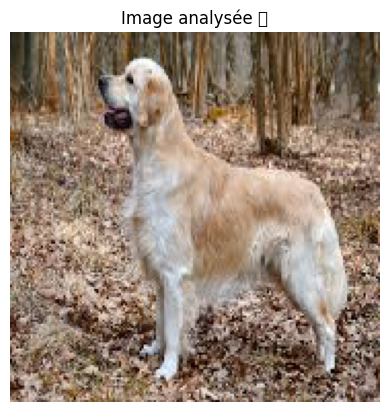

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

data_dir = "F:/Image/Projet/Images"
class_names = sorted(os.listdir(data_dir))

def predict_image(img_path):

    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    predictions = model_1.predict(img_array)[0]
    probabilities = tf.nn.softmax(predictions).numpy()


    top_3_indices = np.argsort(probabilities)[-3:][::-1]

    print("🐶 Top 3 des races prédites :")
    for i in top_3_indices:
        print(f"  • {class_names[i]} ({probabilities[i]*100:.2f} % de confiance)")


    plt.imshow(img)
    plt.axis('off')
    plt.title("Image analysée 🖼️")
    plt.show()


predict_image(r"F:\golden.jpg")


In [28]:
model_1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [29]:
history_2 = model_1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25
)


Epoch 1/25
515/515 ━━━━━━━━━━━━━━━━━━━━ 287s 558ms/step - accuracy: 0.1752 - loss: 3.4917 - val_accuracy: 0.1378 - val_loss: 3.7224
Epoch 2/25
515/515 ━━━━━━━━━━━━━━━━━━━━ 279s 541ms/step - accuracy: 0.1882 - loss: 3.4206 - val_accuracy: 0.1397 - val_loss: 3.7779
Epoch 3/25
515/515 ━━━━━━━━━━━━━━━━━━━━ 295s 573ms/step - accuracy: 0.1913 - loss: 3.3670 - val_accuracy: 0.1470 - val_loss: 3.6922
Epoch 4/25
515/515 ━━━━━━━━━━━━━━━━━━━━ 297s 577ms/step - accuracy: 0.2015 - loss: 3.3261 - val_accuracy: 0.1339 - val_loss: 3.7429
Epoch 5/25
515/515 ━━━━━━━━━━━━━━━━━━━━ 304s 590ms/step - accuracy: 0.2082 - loss: 3.2850 - val_accuracy: 0.1514 - val_loss: 3.7459
Epoch 6/25
515/515 ━━━━━━━━━━━━━━━━━━━━ 293s 570ms/step - accuracy: 0.2208 - loss: 3.2251 - val_accuracy: 0.1441 - val_loss: 3.7999
Epoch 7/25
515/515 ━━━━━━━━━━━━━━━━━━━━ 297s 577ms/step - accuracy: 0.2287 - loss: 3.1864 - val_accuracy: 0.1565 - val_loss: 3.7334
Epoch 8/25
515/515 ━━━━━━━━━━━━━━━━━━━━ 305s 592ms/step - accuracy: 0.2346 -

In [34]:
model_1.save("model_1_dog_breeds.keras")

In [35]:
from keras.models import load_model

model_1 = load_model("model_1_dog_breeds.keras")


Found 20580 files belonging to 120 classes.
🐾 Top 10 des races prédites :
  • n02106550-Rottweiler           : 21.85 %
  • n02105412-kelpie               : 11.28 %
  • n02113624-toy_poodle           : 10.38 %
  • n02106382-Bouvier_des_Flandres : 9.33 %
  • n02104365-schipperke           : 8.76 %
  • n02107683-Bernese_mountain_dog : 6.05 %
  • n02107142-Doberman             : 5.84 %
  • n02111889-Samoyed              : 4.58 %
  • n02107312-miniature_pinscher   : 4.06 %
  • n02110958-pug                  : 2.69 %

📋 Classement complet (120 races) :
  • n02106550-Rottweiler           : 21.85 %
  • n02105412-kelpie               : 11.28 %
  • n02113624-toy_poodle           : 10.38 %
  • n02106382-Bouvier_des_Flandres : 9.33 %
  • n02104365-schipperke           : 8.76 %
  • n02107683-Bernese_mountain_dog : 6.05 %
  • n02107142-Doberman             : 5.84 %
  • n02111889-Samoyed              : 4.58 %
  • n02107312-miniature_pinscher   : 4.06 %
  • n02110958-pug                  : 2.69 %
  • 

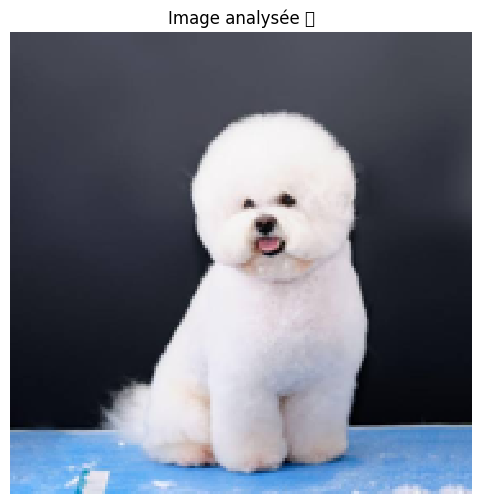

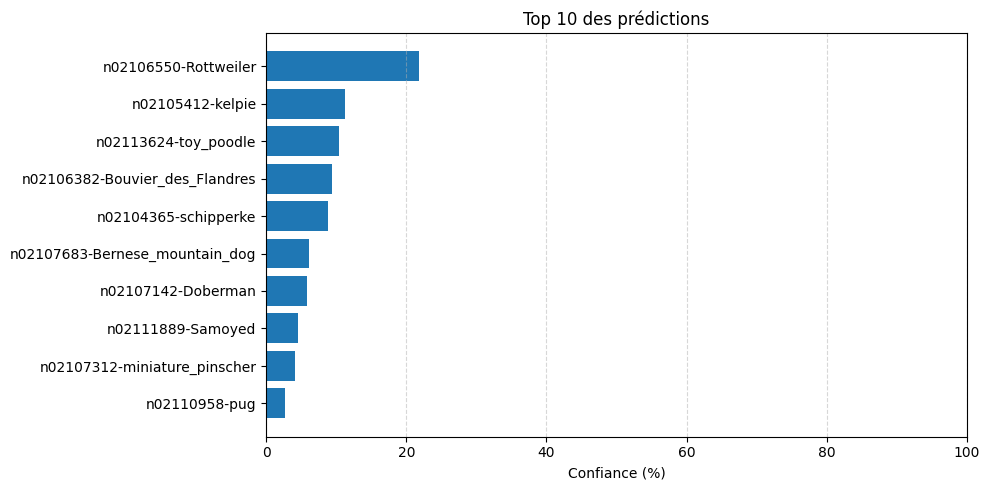

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image
import os

data_dir = "F:/Image/Projet/Images"
temp_ds = image_dataset_from_directory(data_dir, image_size=(180, 180), batch_size=1)
class_names = temp_ds.class_names 

def predict_image(img_path):
    img = Image.open(img_path).convert("RGB").resize((180, 180))
    display_img = np.array(img) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  

    # Prédiction
    predictions = model_1.predict(img_array, verbose=0)[0]
    probs = tf.nn.softmax(predictions).numpy()
    sorted_indices = np.argsort(probs)[::-1]  

    # 🐾 Affichage texte
    print("🐾 Top 10 des races prédites :")
    for i in sorted_indices[:10]:
        print(f"  • {class_names[i]:30s} : {probs[i]*100:.2f} %")

    print("\n📋 Classement complet (120 races) :")
    for i in sorted_indices:
        print(f"  • {class_names[i]:30s} : {probs[i]*100:.2f} %")

    plt.figure(figsize=(6, 6))
    plt.imshow(display_img.astype("uint8"), interpolation="nearest")
    plt.axis('off')
    plt.title("Image analysée 🖼️")
    plt.show()

    top_probs = probs[sorted_indices[:10]]
    top_labels = [class_names[i] for i in sorted_indices[:10]]

    plt.figure(figsize=(10, 5))
    plt.barh(top_labels[::-1], top_probs[::-1] * 100)
    plt.xlabel("Confiance (%)")
    plt.title("Top 10 des prédictions")
    plt.xlim(0, 100)
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
predict_image(r"F:/pasunrotweiler.jpg") 


In [61]:
from collections import Counter
import os

counts = Counter()
for cls in os.listdir(data_dir):
    counts[cls] = len(os.listdir(os.path.join(data_dir, cls)))

for cls, count in counts.most_common(10):
    print(f"{cls:35s} : {count} images")


n02085936-Maltese_dog               : 252 images
n02088094-Afghan_hound              : 239 images
n02092002-Scottish_deerhound        : 232 images
n02112018-Pomeranian                : 219 images
n02090721-Irish_wolfhound           : 218 images
n02107683-Bernese_mountain_dog      : 218 images
n02111889-Samoyed                   : 218 images
n02086240-Shih-Tzu                  : 214 images
n02111500-Great_Pyrenees            : 213 images
n02111129-Leonberg                  : 210 images


In [62]:
from tensorflow.keras import layers, models

img_height = 180
img_width = 180
input_shape = (img_height, img_width, 3)
nombre_classes = 120

def build_model_2():
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    model.add(data_augmentation)
    model.add(layers.Rescaling(1./255))

    for filters in [32, 64, 128, 256]:
        model.add(layers.Conv2D(filters, 3, padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Conv2D(filters, 3, padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D())
        model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(nombre_classes))

    return model


In [63]:
model_2 = build_model_2()

model_2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model_2.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 45, 45, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 22, 22, 256)    │         1,02

 Total params: 9,138,072 (34.86 MB)

 Trainable params: 9,135,640 (34.85 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [65]:
history_2 = model_2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)


Epoch 1/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 1254s 2s/step - accuracy: 0.0613 - loss: 4.3251 - val_accuracy: 0.0520 - val_loss: 4.3123
Epoch 2/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 1251s 2s/step - accuracy: 0.0770 - loss: 4.1264 - val_accuracy: 0.0503 - val_loss: 4.4276
Epoch 3/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 1252s 2s/step - accuracy: 0.0934 - loss: 3.9806 - val_accuracy: 0.0897 - val_loss: 4.0453
Epoch 4/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 1253s 2s/step - accuracy: 0.1128 - loss: 3.8518 - val_accuracy: 0.0965 - val_loss: 4.0066
Epoch 5/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 1251s 2s/step - accuracy: 0.1301 - loss: 3.7226 - val_accuracy: 0.0513 - val_loss: 4.4014
Epoch 6/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 1251s 2s/step - accuracy: 0.1427 - loss: 3.6194 - val_accuracy: 0.0933 - val_loss: 4.0538
Epoch 7/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 1254s 2s/step - accuracy: 0.1645 - loss: 3.4879 - val_accuracy: 0.1132 - val_loss: 3.8766
Epoch 8/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 1289s 3s/step - accuracy: 0.1848 - loss: 3.3716 - 

C:\Users\Proprietaire\AppData\Local\Temp\ipykernel_49996\4142417175.py:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Proprietaire\AppData\Local\Temp\ipykernel_49996\4142417175.py:29: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
F:\dev\bulshit\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
F:\dev\bulshit\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


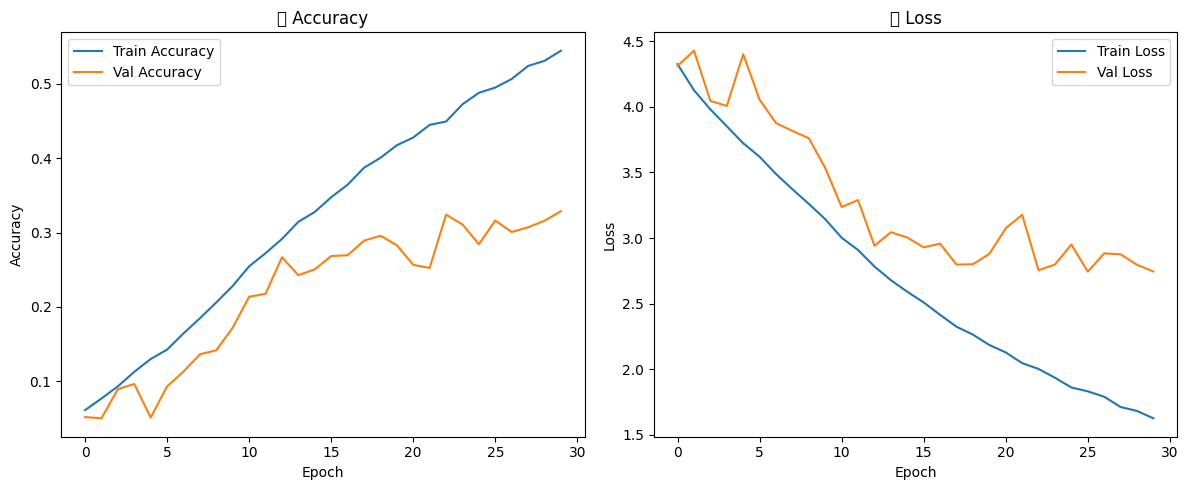

In [66]:
import matplotlib.pyplot as plt

# Récupération des données
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs_range = range(len(acc))

# Tracé
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('📈 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('📉 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [67]:
model_2.save("model_3_dogs_breeds.keras")

In [69]:
from tensorflow.keras.models import load_model

model_3 = load_model("model_3_dogs_breeds.keras")

🐾 Top 3 des races prédites :
  • n02105412-kelpie (43.75 % de confiance)
  • n02099712-Labrador_retriever (32.20 % de confiance)
  • n02104365-schipperke (8.68 % de confiance)


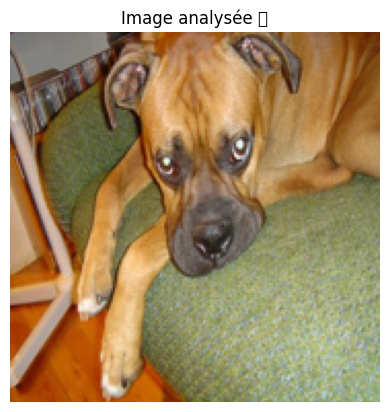

In [82]:
def predict_image(img_path, model):
    from PIL import Image
    img = Image.open(img_path).convert("RGB")
    img = img.resize((180, 180))
    display_img = np.array(img)

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array, verbose=0)[0]
    probs = tf.nn.softmax(predictions).numpy()
    top3 = np.argsort(probs)[-3:][::-1]

    print("🐾 Top 3 des races prédites :")
    for i in top3:
        print(f"  • {class_names[i]} ({probs[i]*100:.2f} % de confiance)")

    plt.imshow(display_img.astype("uint8"))
    plt.axis('off')
    plt.title("Image analysée 🖼️")
    plt.show()
predict_image(r"F:/Image/Projet/Images/n02108089-boxer/n02108089_1.jpg", model_3) 

In [81]:
import os
from collections import Counter

"""
data_dir = "F:/Image/Projet/Images"  # ex : "dataset/train"
class_counts = Counter([label for label in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, label))])
print(class_counts)
"""

train_ds = tf.keras.utils.image_dataset_from_directory(
    "F:/Image/Projet/Images",
    image_size=(180, 180),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "F:/Image/Projet/Images",
    image_size=(180, 180),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=123
)


Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.
